# Minimizar función x^2y𝜋/3
gradiente = grad_x, grad_y

grad_x = (2y𝜋/3).x

grad_y = (x^2𝜋/3).1

In [137]:
import numpy as np
from matplotlib import pylab as plt
import grafica_Grad as gr
import math
import io

# Iniciar en un punto aleatorio del dominio de la función
x = 1.5
y = 1.5


# Mucho ciudado con los valores iniciales que elijo para x e y, ya que si mi función es cuadrática puedo terminar obteniendo valores muy muy elevados

In [138]:
# PARAMETROS
alfa = 0.1  # proporción del gradiente a utilizar para modificar la posición actual
MAX_ITE = 100  # máxima cantidad de "pasos"
Cota_ERROR = 10e-6

In [139]:
ite = 0
z_new = x**2 * y * math.pi/3
#z = z_new + Cota_ERROR * 10
z = 1

puntos = []
diferencia = []
valorZ = [z_new]
while ((ite<MAX_ITE) and (np.abs(z - z_new)>Cota_ERROR)):
    z = z_new
    PtoAnt = [x, y, z]#para el gráfico 3d

    grad_x = (2*y*pi*x)/3   # derivada respecto de x
    grad_y = ((x**2)*pi)/3   # derivada respecto de y
    
    x = x - alfa * grad_x
    y = y - alfa * grad_y
    print(x)
    z_new = x**2 * y * math.pi/3
    
    #para los gráficos 2d
    diferencia.append( np.abs(z - z_new) )
    valorZ.append(z_new)
    
    #para los gráficos 3d
    #gr.graficarPaso(PtoAnt, [x, y, z_new], h)
    puntos.append([PtoAnt, [x, y, z_new]])
    
    ite = ite + 1
    

1.028761101961531
0.7563335954373478
0.5736041222304022
0.44221849697284565
0.3441182765225457
0.2692562096221707
0.21137950528599975
0.16627952629061
0.13096503802545467
0.10323006802057917
0.08140747261747158
0.06421714966087042
0.05066613707017104
0.039979222643453126
0.031548730182880916
0.024897097181853893
0.019648416631374413
0.0155065035856096
0.012237842760989602
0.009658256961967874
0.00762244764911
0.0060157706520531816
0.004747760383218055
0.0037470263795169128


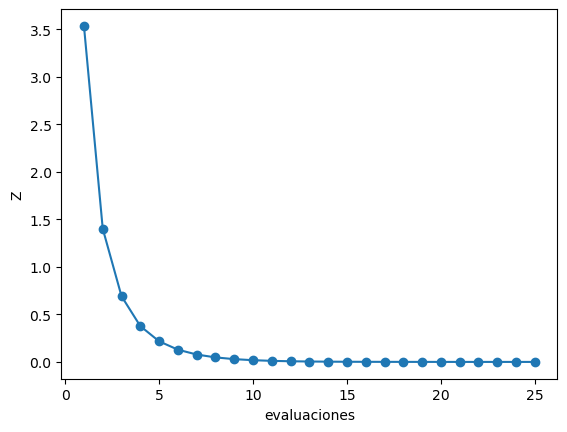

In [140]:
# El valor de la función debe ir disminuyendo
plt.plot(range(1, len(valorZ) + 1), valorZ, marker='o')
plt.xlabel('evaluaciones')
plt.ylabel('Z')
plt.show()

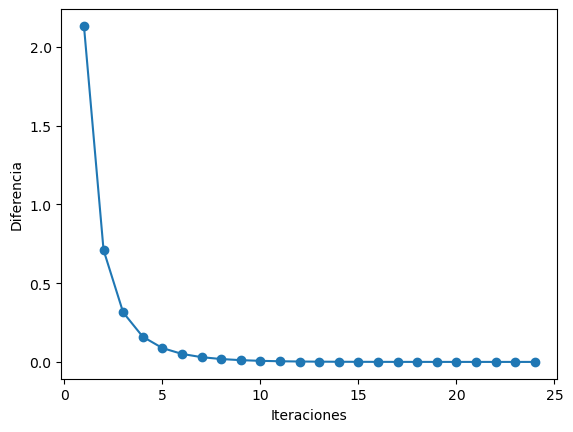

In [141]:
# La diferencia entre 2 valores consecutivos de la función debería tender a cero 
plt.plot(range(1, len(diferencia) + 1), diferencia, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Diferencia')
plt.show()


In [149]:
print(f"le mínimo es ({x}, {y}, {z})")

le mínimo es (0.0037470263795169128, 1.006399082822215, 2.3756226284557357e-05)


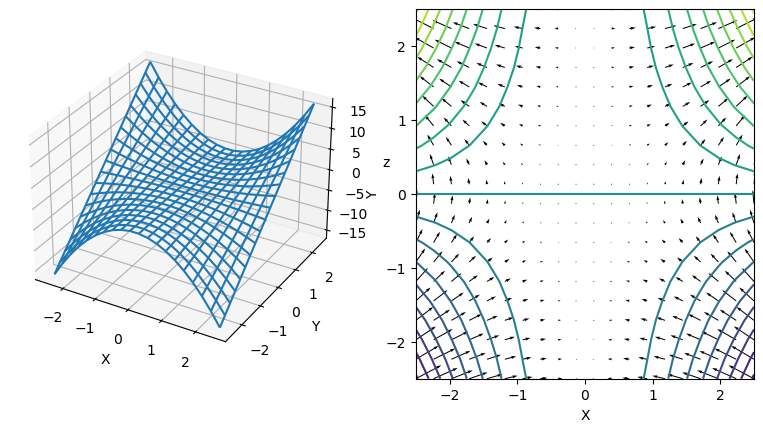

In [148]:
X = np.linspace(-2.5,2.5,num=20)
Y = np.linspace(-2.5,2.5,num=20)
X, Y = np.meshgrid(X,Y)
Z = X**2 * Y * math.pi/3 #usar X  e Y, no x e y
etiquetas = ['X', 'Y', 'z']

fig = plt.figure(figsize=plt.figaspect(0.5))
#fig=plt.figure(figsize=(7, 3))
#gs = gridspec.GridSpec(6,11)

ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = fig.add_subplot(gs[:,0:6], projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel(etiquetas[0])
ax.set_ylabel(etiquetas[1])
ax.set_zlabel(etiquetas[2]);

ax1 = fig.add_subplot(1, 2, 2)
#ax = fig.add_subplot(gs[1:4,8:11])
ph, pr = np.gradient(Z,0.05,0.05)
ax1.contour(X,Y,Z,20)
ax1.quiver(X,Y,pr,ph)
ax1.set_xlabel(etiquetas[0])
ax1.set_ylabel(etiquetas[1])
# xPos = ax1.get_xlim()
# yPos = ax1.get_ylim()
# aux = plt.text((xPos[1]+xPos[0])*0.5,(yPos[1]+yPos[0])*0.5,'*CLICK AQUI*', horizontalalignment='center',fontsize = 9);

plt.show()
# coord = plt.ginput(1);
# aux.remove()

#return([coord[0][0], coord[0][1], [ax, ax1]])      


# Notar que al minimizar la función obtenemos como respuesta el punto (0,1,0) aprox, que es el lugar donde la función está más tranquila (su mínimo es hacia infinito, pero no estamos buscando eso)